In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
df = pd.read_csv('segmentation data.csv')
df.head(10) #read data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [3]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.duplicated().sum() #check duplicates

0

In [5]:
df.isnull().sum() #check missing values

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df.nunique() #no of unique columns

ID                 2000
Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

<Axes: ylabel='Income'>

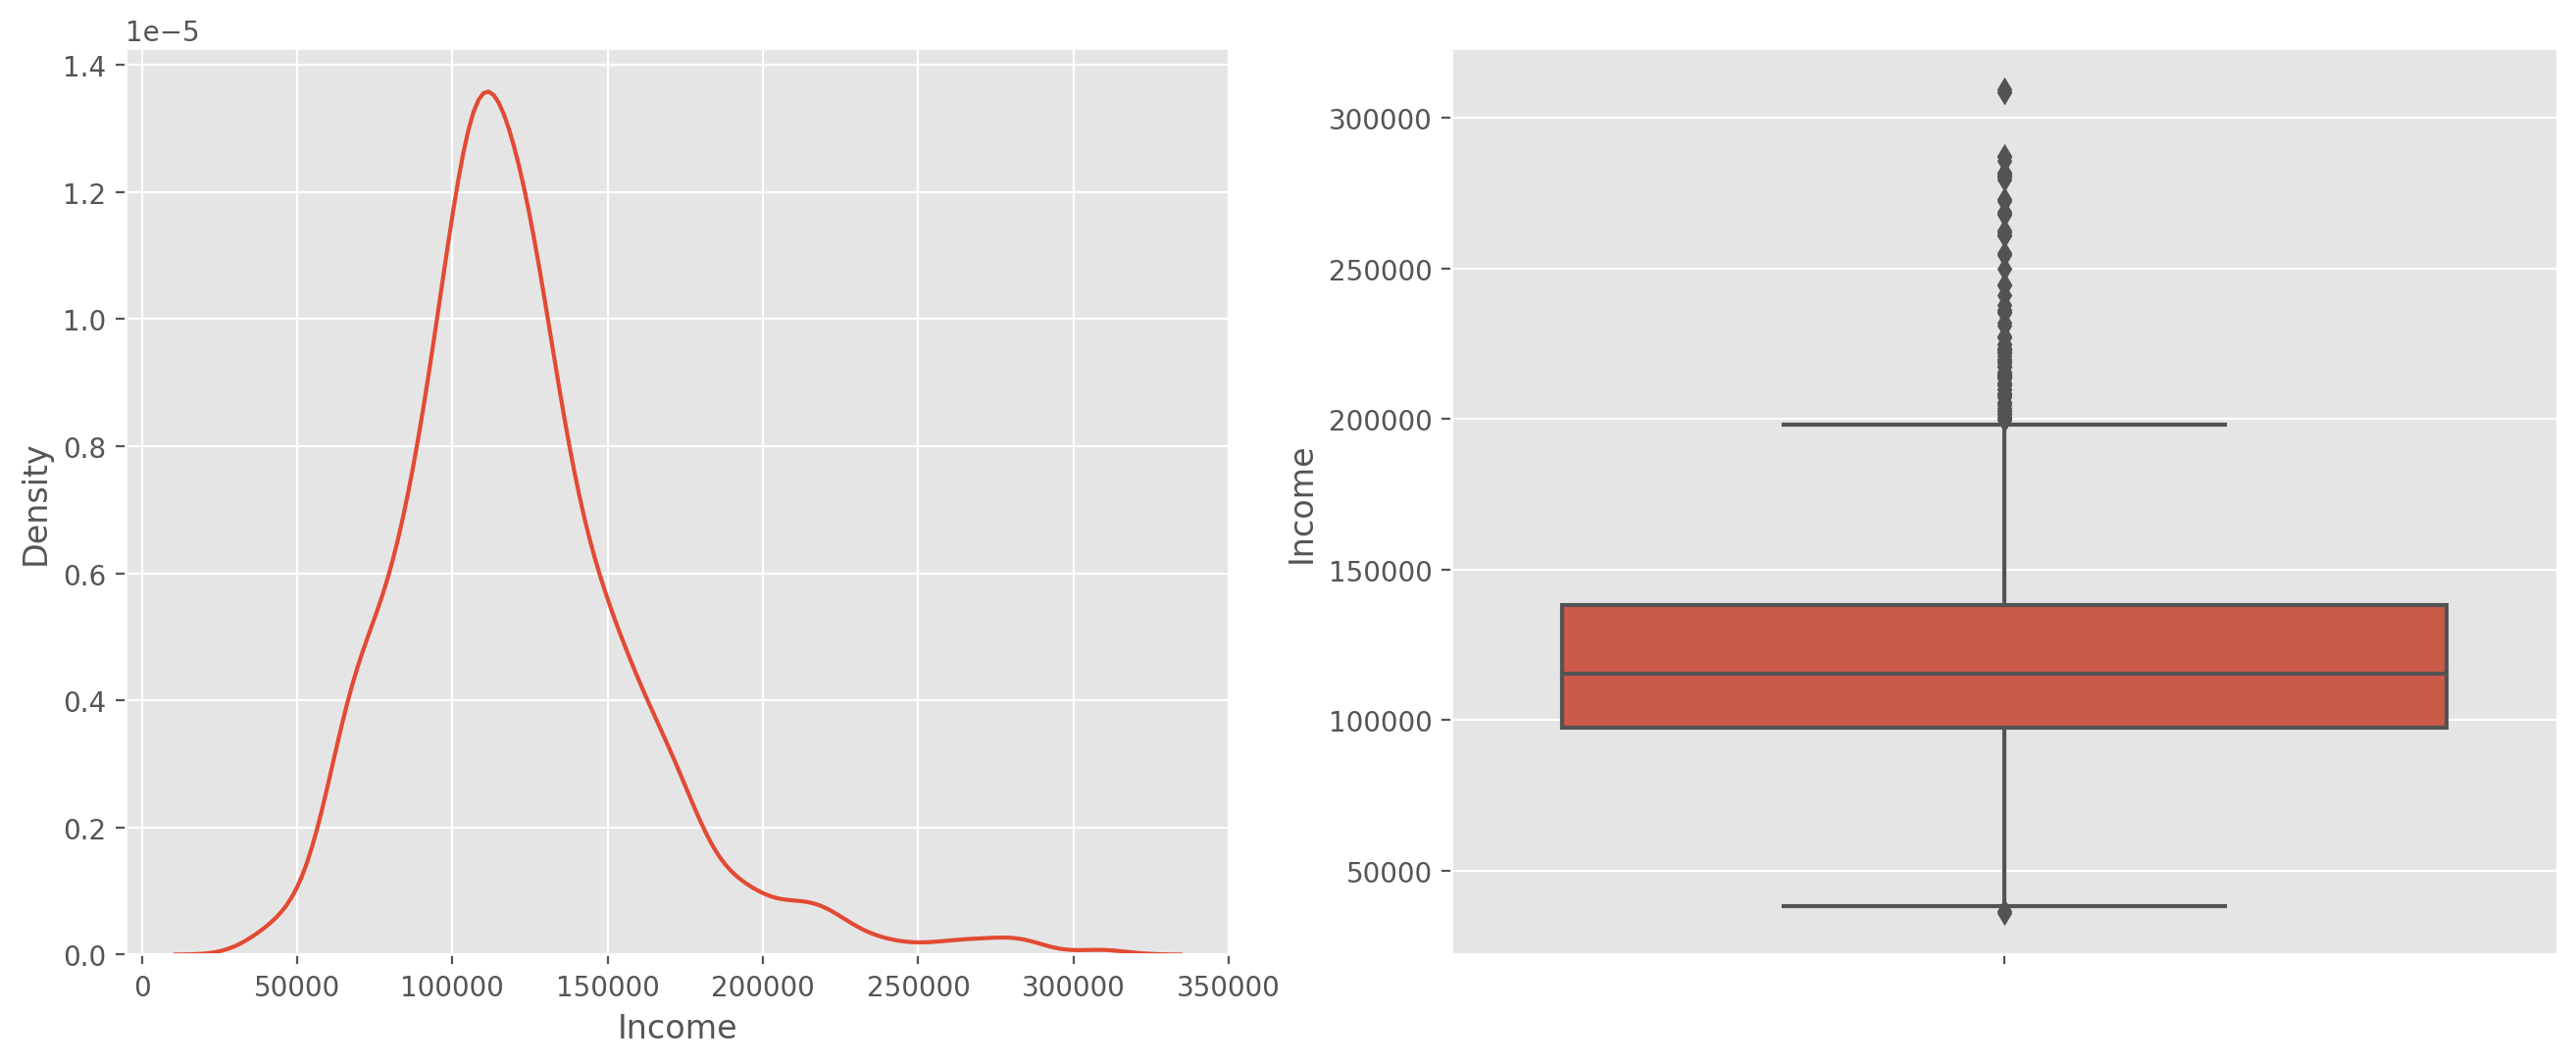

In [7]:
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(df['Income'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['Income']) #iincome range

<Axes: xlabel='Occupation', ylabel='Income'>

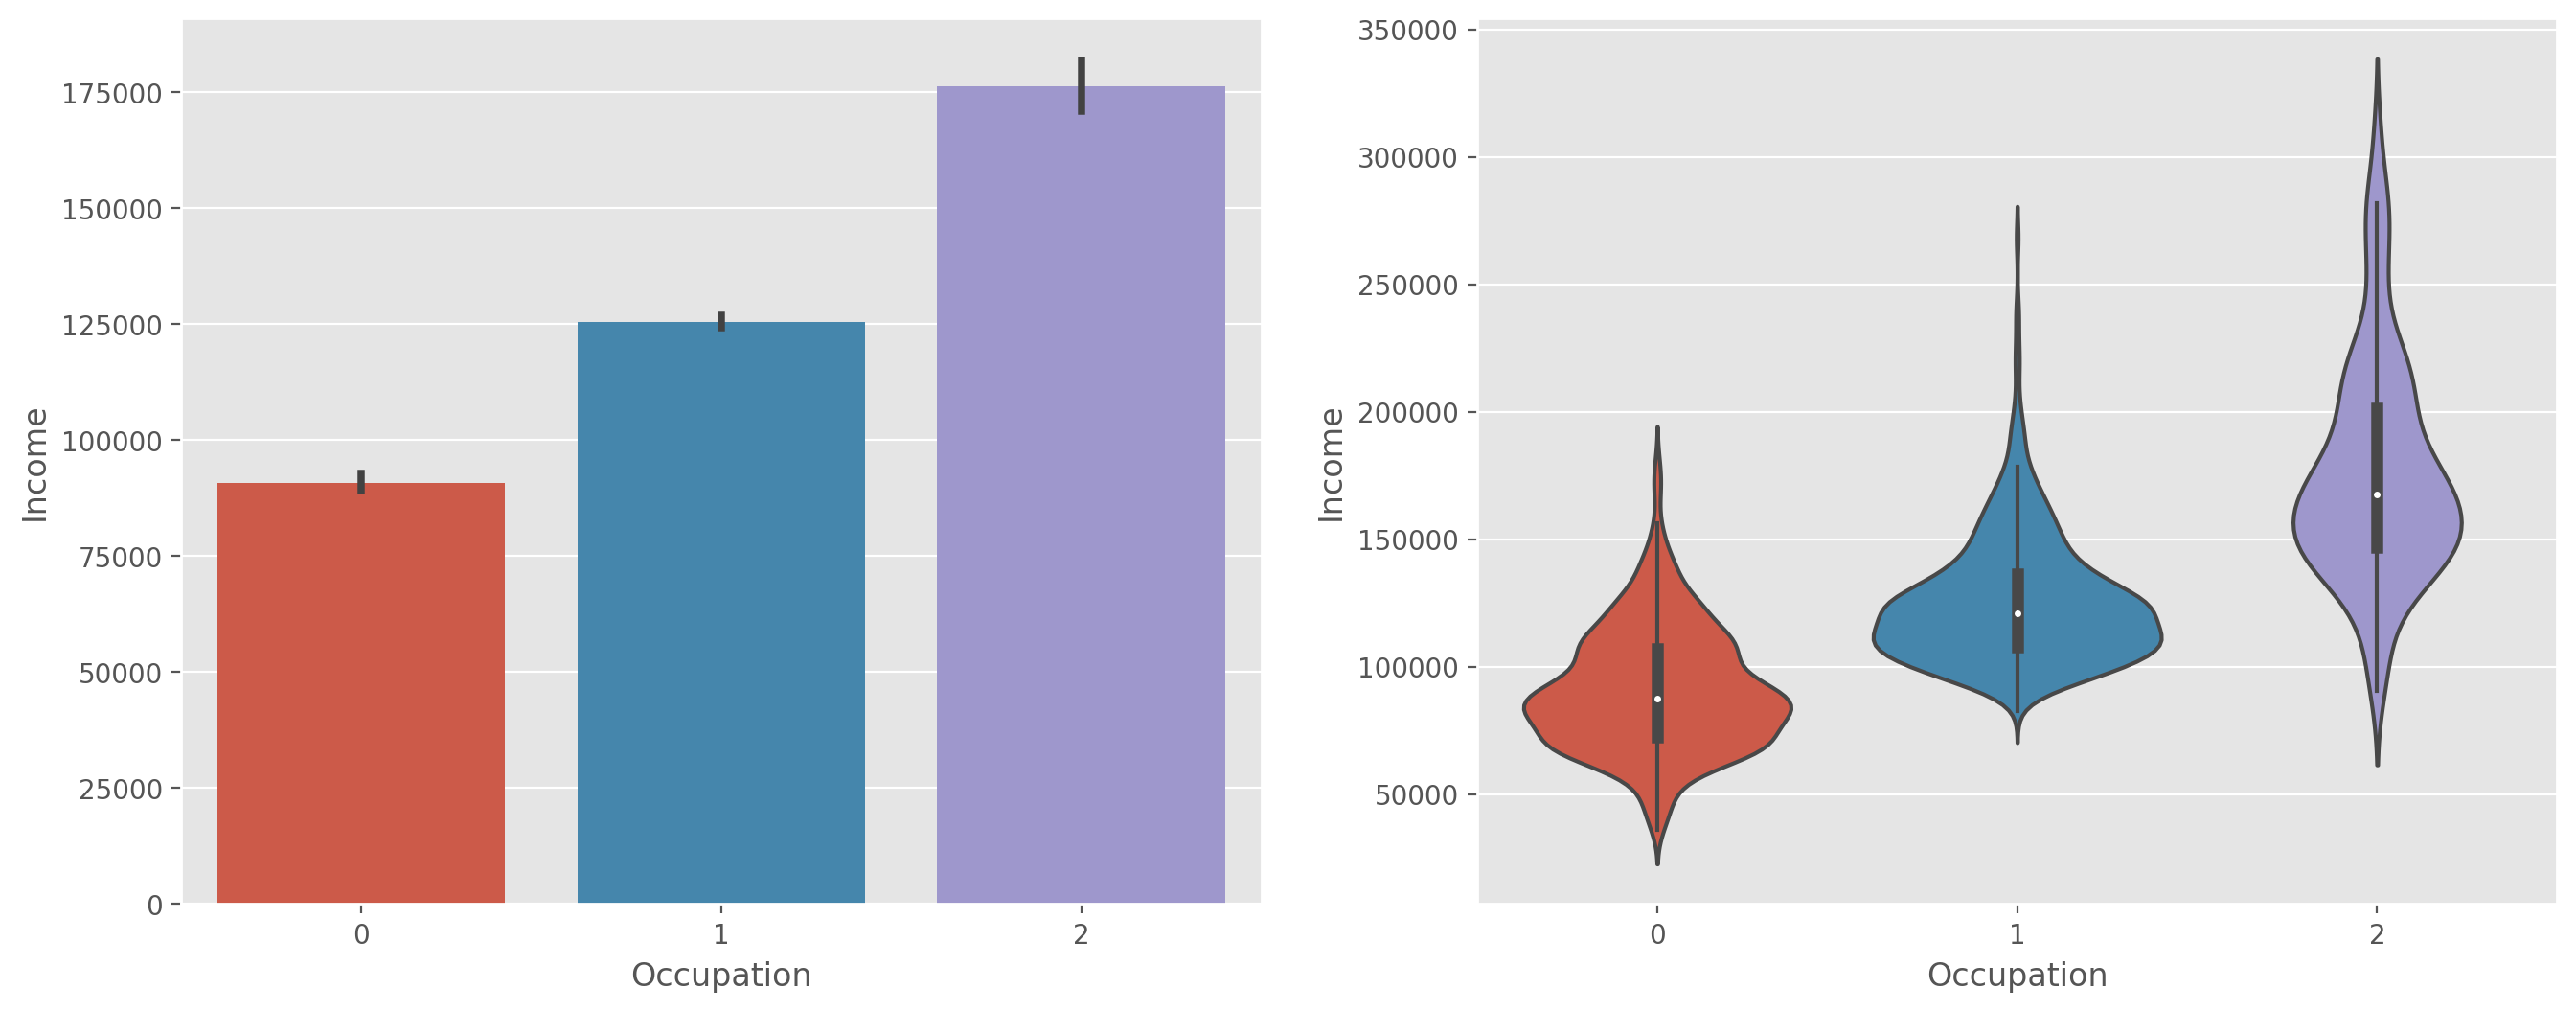

In [8]:
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x='Occupation',y='Income',data=df)
plt.subplot(1,2,2)
sns.violinplot(x='Occupation',y='Income',data=df) #occupation 2 income ishigh

<Axes: xlabel='Age', ylabel='Income'>

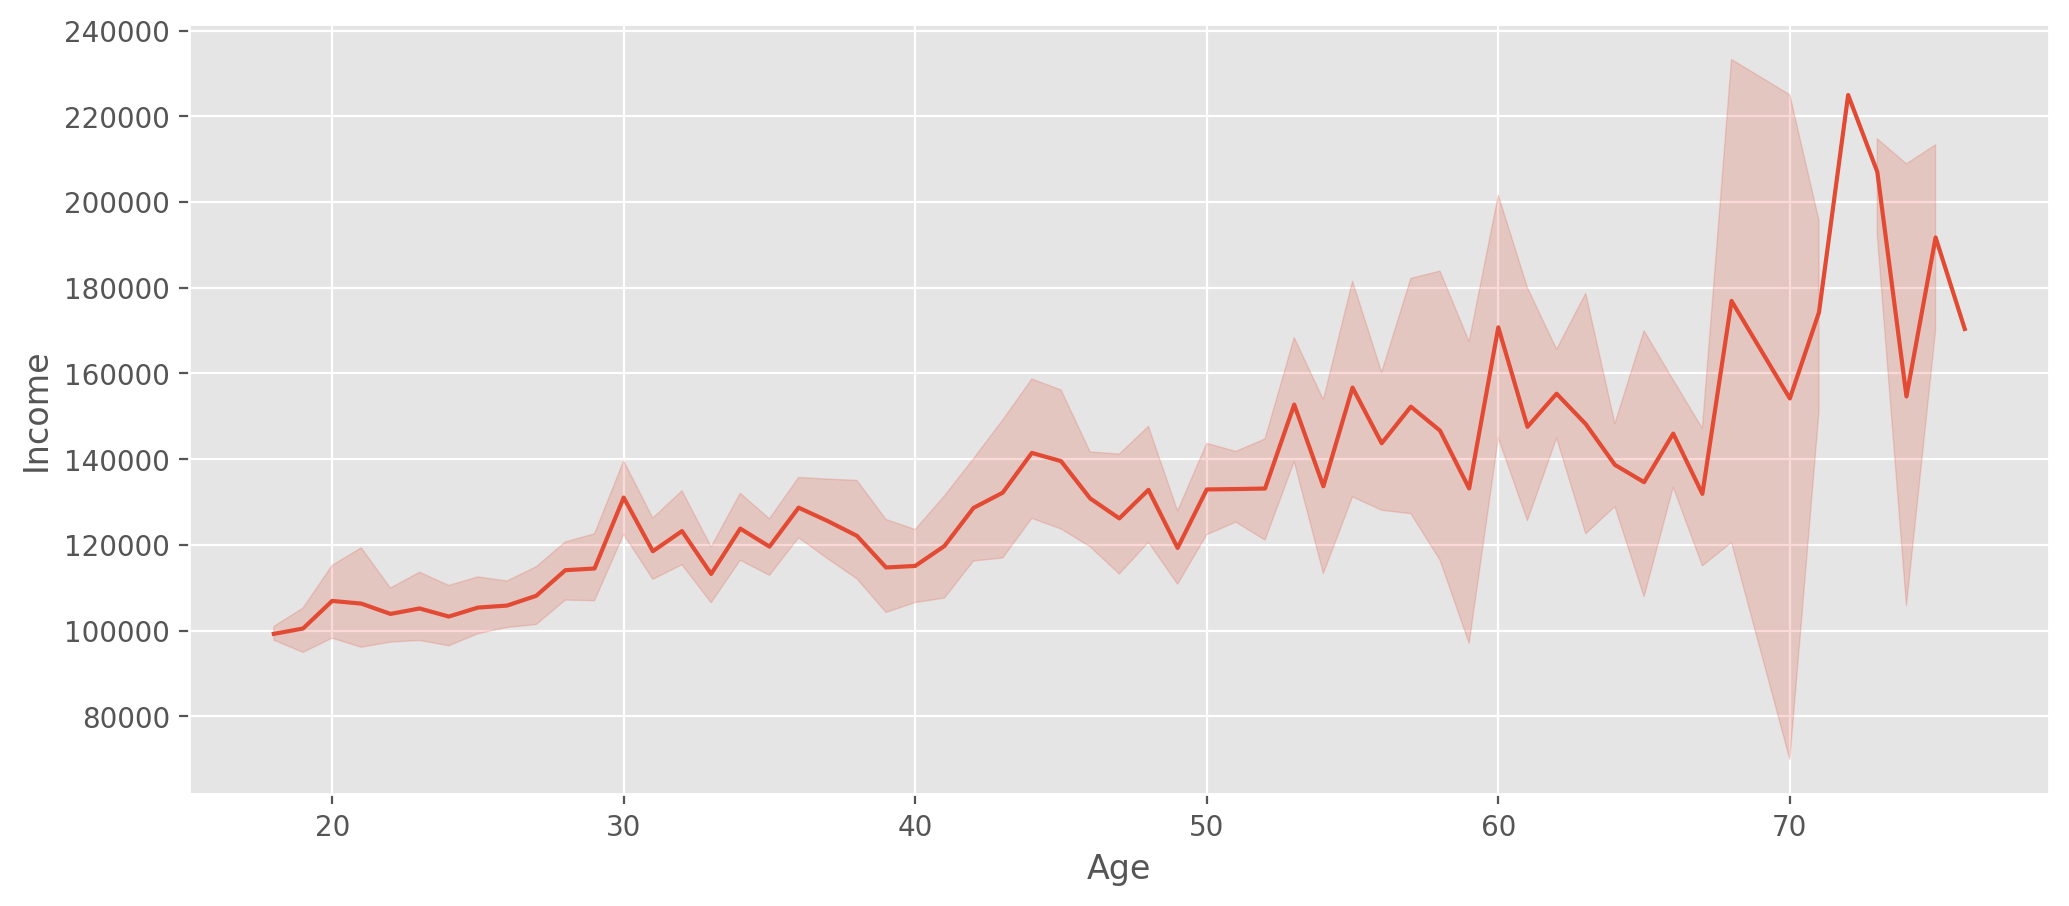

In [9]:
plt.figure(figsize = (12,5), dpi = 200)
sns.lineplot(x='Age',y='Income',data=df) #income increase with increase in age

In [10]:
#segmentation based on occupation and income
X=df[['Age','Occupation','Income']].values
X[:5] #extract features 

array([[    67,      1, 124670],
       [    22,      1, 150773],
       [    49,      0,  89210],
       [    45,      1, 171565],
       [    53,      1, 149031]], dtype=int64)

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(X) #

KMeans(n_clusters=3)

In [12]:
y_kmeans = km.predict(X)
y_kmeans #predict

array([1, 1, 0, ..., 0, 0, 0])

In [13]:
km.cluster_centers_ #cluster centers

array([[3.21853360e+01, 4.69450102e-01, 9.29562617e+04],
       [3.87003484e+01, 1.04645761e+00, 1.36642021e+05],
       [4.38917197e+01, 1.64968153e+00, 2.10044643e+05]])

In [14]:
km.inertia_ #wcss

675301316906.6777

In [15]:
# Extracting all data points belonging to cluster 0
X[y_kmeans == 0]

array([[    49,      0,  89210],
       [    25,      1, 108469],
       [    22,      1, 108687],
       ...,
       [    31,      0,  86400],
       [    24,      0,  97968],
       [    25,      0,  68416]], dtype=int64)

In [16]:
# Extracting annual income for data points belonging to cluster 0
X[y_kmeans == 0,0]

array([49, 25, 22, 60, 28, 32, 48, 26, 36, 39, 57, 25, 24, 23, 29, 25, 26,
       27, 29, 37, 25, 46, 24, 58, 52, 27, 28, 56, 33, 41, 24, 24, 26, 23,
       27, 25, 24, 30, 40, 30, 27, 38, 44, 27, 22, 23, 39, 38, 20, 45, 34,
       30, 33, 33, 26, 33, 26, 40, 36, 31, 68, 20, 29, 28, 27, 21, 38, 43,
       26, 21, 45, 39, 31, 24, 26, 23, 30, 32, 27, 22, 22, 25, 42, 35, 29,
       27, 25, 52, 35, 22, 46, 24, 35, 29, 57, 27, 57, 32, 37, 38, 25, 32,
       32, 26, 49, 49, 48, 26, 45, 54, 37, 49, 24, 33, 24, 22, 40, 25, 29,
       31, 38, 32, 27, 32, 36, 39, 28, 23, 24, 31, 26, 43, 23, 23, 34, 23,
       29, 23, 28, 23, 21, 25, 36, 23, 34, 36, 52, 39, 25, 26, 26, 25, 21,
       27, 19, 31, 39, 28, 27, 22, 27, 20, 40, 35, 33, 33, 30, 47, 29, 20,
       55, 33, 25, 25, 23, 65, 26, 30, 41, 41, 34, 29, 34, 27, 36, 38, 34,
       29, 26, 35, 23, 28, 33, 39, 44, 23, 26, 35, 26, 26, 27, 38, 39, 20,
       40, 32, 24, 27, 28, 26, 20, 37, 40, 36, 26, 42, 31, 41, 41, 26, 25,
       23, 34, 61, 43, 32

In [17]:
wcss = []
for k in range(1,21):
    km = KMeans(n_clusters = k)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

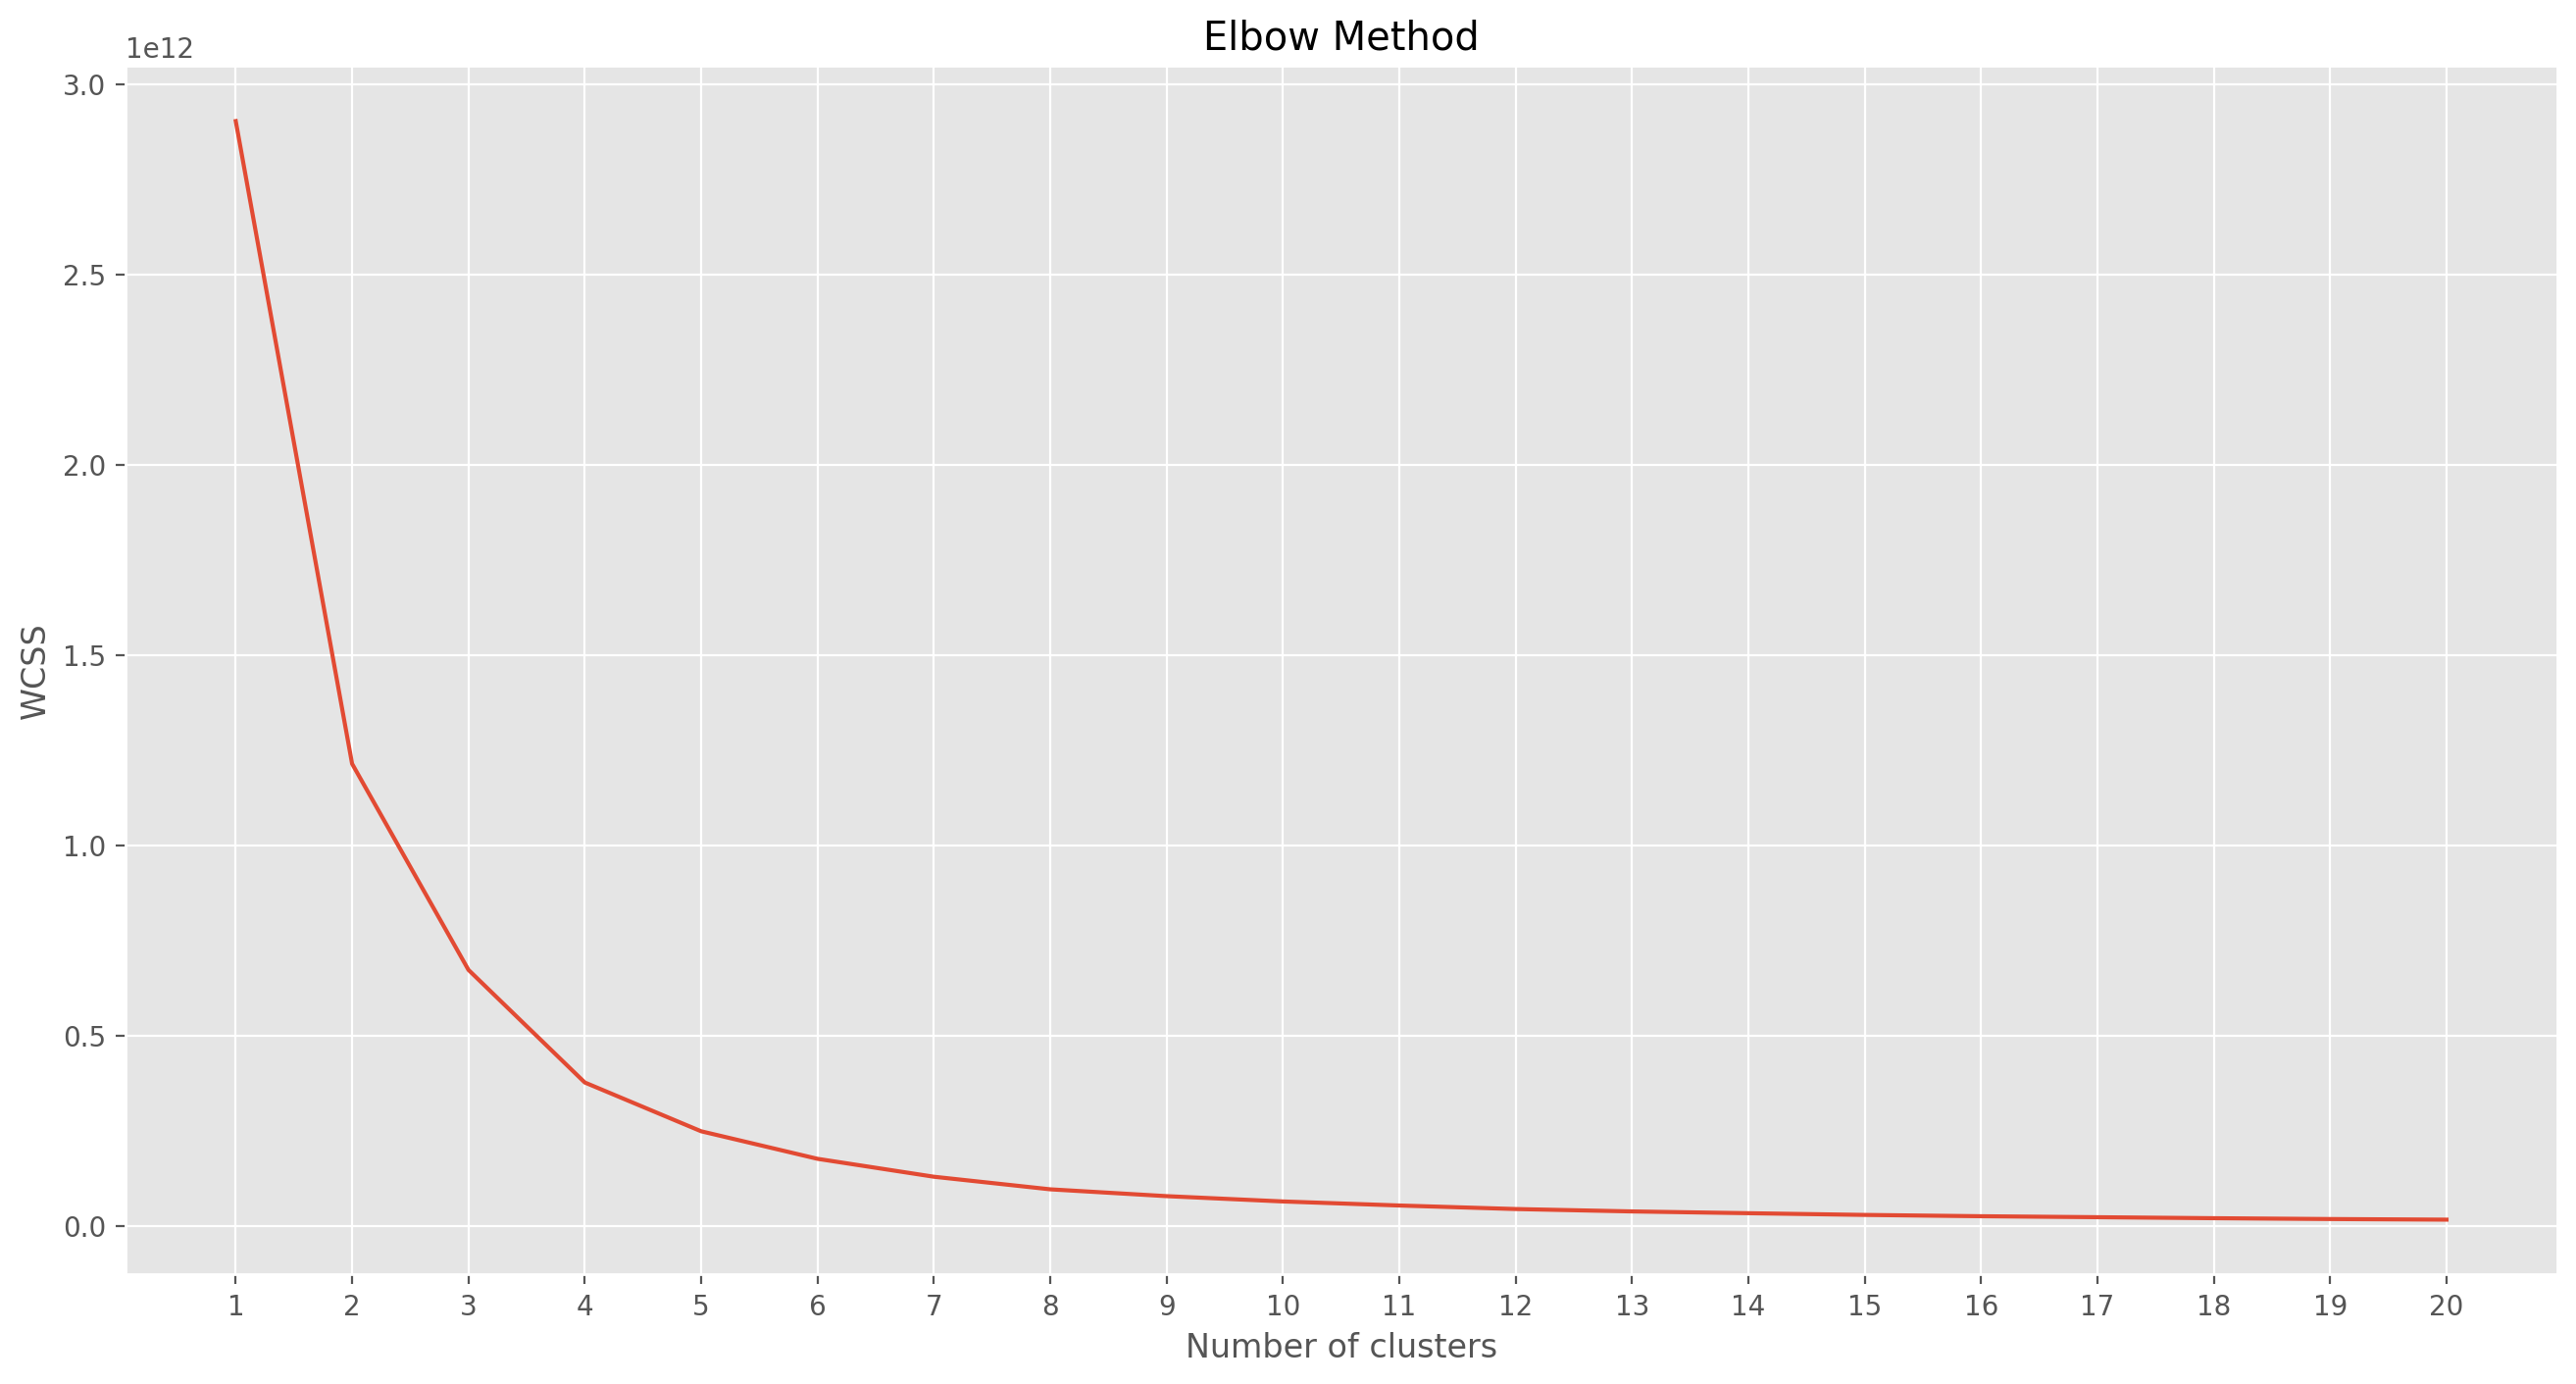

In [18]:
k = range(1,21)
plt.figure(figsize = (16,8), dpi = 200)
plt.plot(k, wcss)

plt.xticks(k)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #extract best value of clusters

In [19]:
# Best model
km_best = KMeans(n_clusters = 4)
km_best.fit(X)

KMeans(n_clusters=4)

In [20]:
y_kmeans = km_best.predict(X)
y_kmeans #performance 

array([0, 2, 3, ..., 3, 0, 3])

In [21]:
centroids = km_best.cluster_centers_
centroids #centroids

array([[3.43819517e+01, 8.26862539e-01, 1.14750034e+05],
       [4.45904762e+01, 1.77142857e+00, 2.25124867e+05],
       [4.09629630e+01, 1.24836601e+00, 1.54064475e+05],
       [3.22318841e+01, 1.53209110e-01, 7.90856128e+04]])